# Performance and Efficiency Segmentation 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv("3_ev_market_india_dataset.csv")
df.shape

(103, 14)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        103 non-null    object 
 1   Model        103 non-null    object 
 2   Accel        103 non-null    float64
 3   TopSpeed     103 non-null    int64  
 4   Range        103 non-null    int64  
 5   Efficiency   103 non-null    int64  
 6   FastCharge   103 non-null    int64  
 7   RapidCharge  103 non-null    object 
 8   PowerTrain   103 non-null    object 
 9   PlugType     103 non-null    object 
 10  BodyStyle    103 non-null    object 
 11  Segment      103 non-null    object 
 12  Seats        103 non-null    int64  
 13  PriceEuro    103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [3]:
df.describe()

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


### Car Price Categories Distribution

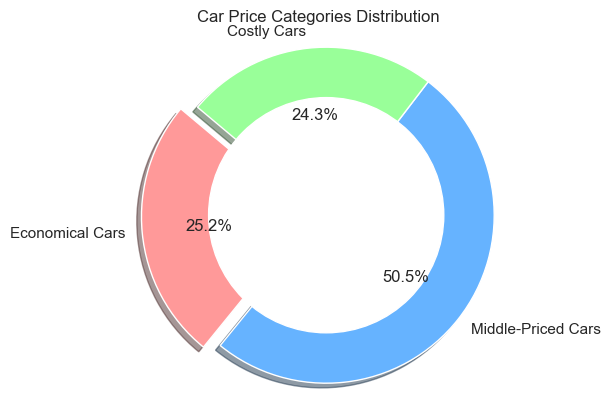

In [6]:
car_data = pd.read_csv("3_ev_market_india_dataset.csv")

sorted_prices = car_data['PriceEuro'].sort_values()

Q1 = sorted_prices.quantile(0.25)
Q3 = sorted_prices.quantile(0.75)


economical_cutoff = Q1
costly_cutoff = Q3

economical_cars = car_data[car_data['PriceEuro'] < economical_cutoff]
middle_priced_cars = car_data[(car_data['PriceEuro'] >= economical_cutoff) & (car_data['PriceEuro'] <= costly_cutoff)]
costly_cars = car_data[car_data['PriceEuro'] > costly_cutoff]

labels = ['Economical Cars', 'Middle-Priced Cars', 'Costly Cars']
sizes = [len(economical_cars), len(middle_priced_cars), len(costly_cars)]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)  


sns.set(style='whitegrid')

# Create a pie chart with a shadow
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Car Price Categories Distribution')
plt.show()

### Brand wise Range of EVs

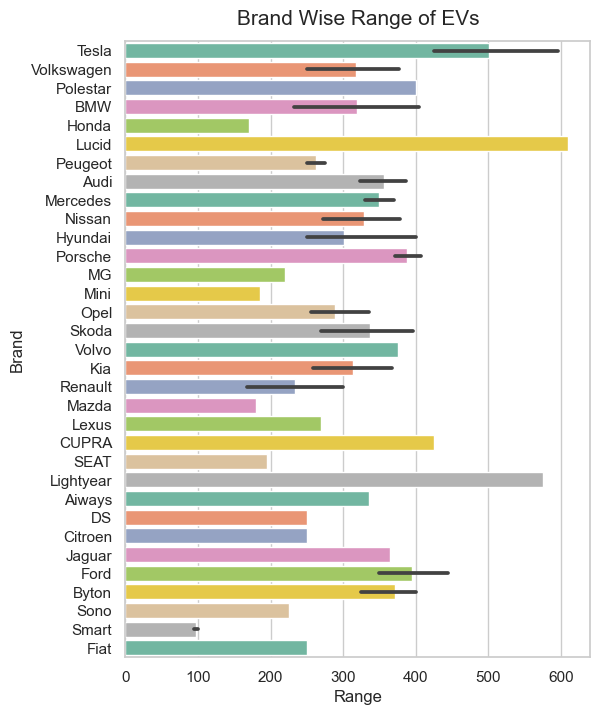

In [17]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df, y='Brand', x='Range', palette='Set2')
plt.xticks(family='arial')
plt.yticks(family='arial')
plt.xlabel('Range', family='arial', size=12)
plt.ylabel('Brand', family='arial', size=12)
plt.title(label='Brand Wise Range of EVs', family='arial', size=15, pad=12)
plt.show()

### Brand Wise Top Speed of EVs

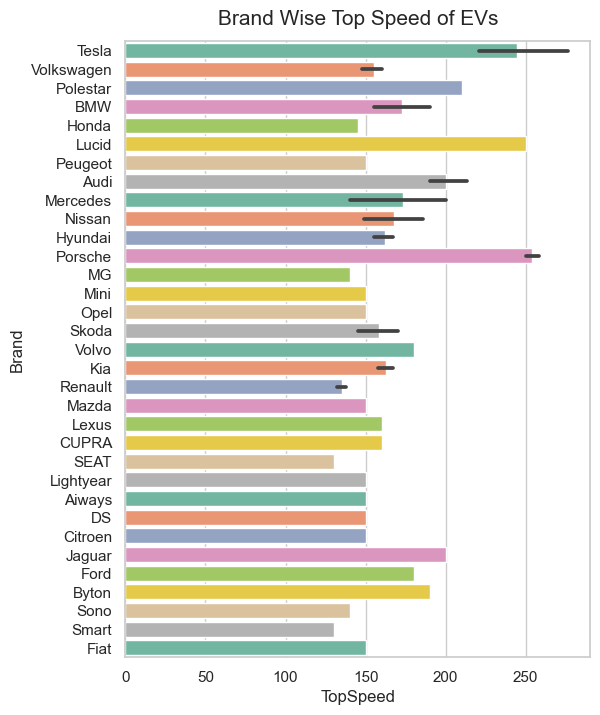

In [18]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df, y='Brand', x='TopSpeed', palette='Set2')
plt.xticks(family='arial')
plt.yticks(family='arial')
plt.xlabel('TopSpeed', family='arial', size=12)
plt.ylabel('Brand', family='arial', size=12)
plt.title(label='Brand Wise Top Speed of EVs', family='arial', size=15, pad=12)
plt.show()

### Brand Wise Efficiency of EVs

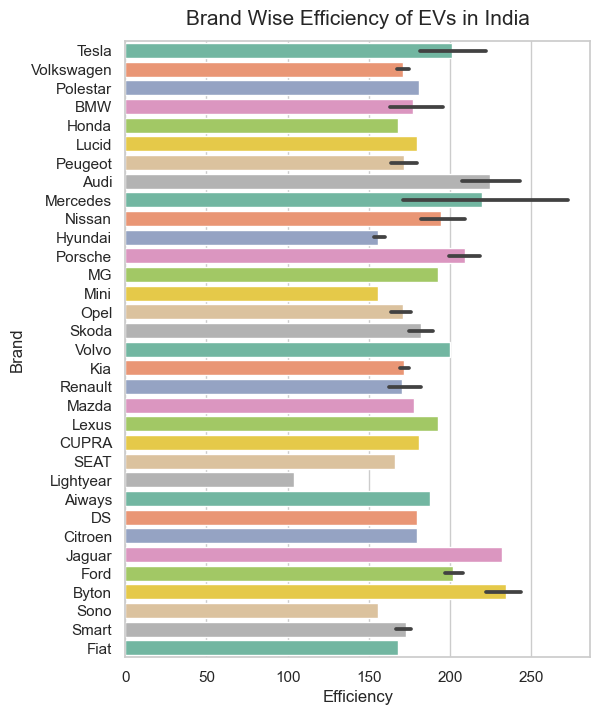

In [9]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df, y='Brand', x='Efficiency', palette='Set2')
plt.xticks(family='arial')
plt.yticks(family='arial')
plt.xlabel('Efficiency', family='arial', size=12)
plt.ylabel('Brand', family='arial', size=12)
plt.title(label='Brand Wise Efficiency of EVs in India', family='arial', size=15, pad=12)
plt.show()

### Brand Wise Acceleration of EVs

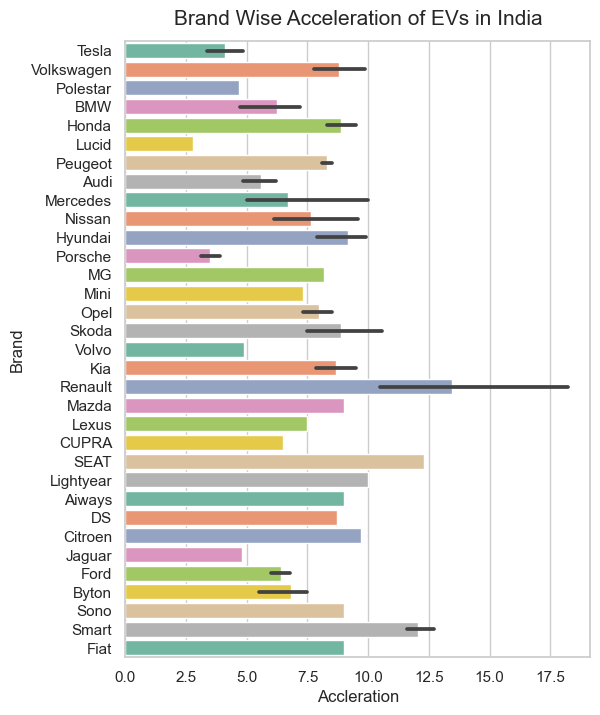

In [19]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df, y='Brand', x='Accel', palette='Set2')
plt.xticks(family='arial')
plt.yticks(family='arial')
plt.xlabel('Accleration', family='arial', size=12)
plt.ylabel('Brand', family='arial', size=12)
plt.title(label='Brand Wise Acceleration of EVs in India', family='arial', size=15, pad=12)
plt.show()

Price Range: The cars are filtered based on their price in Euros. Affordable cars for middle-class individuals are selected within the price range of 20,000 to 40,000 Euros.

Sort Order: The filtered affordable cars are then sorted based on multiple factors in a specific order:

Range: Cars with the highest driving range (in kilometers) are ranked higher, as more range means longer driving distances between charges, which can be beneficial for daily commuting and convenience.
Efficiency: Cars with lower energy consumption (measured in Wh/Km) are ranked higher, as higher efficiency can lead to potential cost savings in the long run.
Fast Charge: Cars with fast charging capability are ranked higher, as fast charging allows quicker recharging of the battery, reducing downtime during long trips.
Rapid Charge: Cars with rapid charging capability are ranked higher, as rapid charging allows even faster recharging, providing more flexibility for middle-class individuals with busy schedules.

### Filtering Top 5 affordable EV cars for middle class people

In [11]:
#Price range for middle-class individuals (e.g., 20,000 to 40,000 Euro)
affordable_cars = df[(df['PriceEuro'] >= 20000) & (df['PriceEuro'] <= 40000)]

# Sort the affordable cars based on factors like range, efficiency, and charging options
sorted_cars = affordable_cars.sort_values(by=['Range', 'Efficiency', 'FastCharge', 'RapidCharge'], ascending=[False, True, False, False])

# Display the top 5 cars that may be suitable for middle-class people
top_cars_for_middle_class = sorted_cars.head(5)
a=top_cars_for_middle_class[['Brand', 'Model', 'PriceEuro', 'Range', 'Efficiency', 'RapidCharge']]
a

,Brand,Model,PriceEuro,Range,Efficiency,RapidCharge
53,Skoda,Enyaq iV 80,40000,420,183,Yes
31,Kia,e-Niro 64 kWh,38105,370,173,Yes
45,Kia,e-Soul 64 kWh,36837,365,175,Yes
92,Kia,e-Soul 64 kWh,36837,365,175,No
26,Volkswagen,ID.3 Pro,33000,350,166,Yes


### Filtering EVs suitable for hilly area

In [8]:
hilly_areas_criteria = (df['Accel'] <= 7) & (df['TopSpeed'] >= 180) & (df['Range'] >= 300)
hilly_areas_ev = df[hilly_areas_criteria]

hilly_areas_ev[['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency','BodyStyle']].head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,BodyStyle
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,Sedan
2,Polestar,2,4.7,210,400,181,Liftback
3,BMW,iX3,6.8,180,360,206,SUV
5,Lucid,Air,2.8,250,610,180,Sedan
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,Sedan


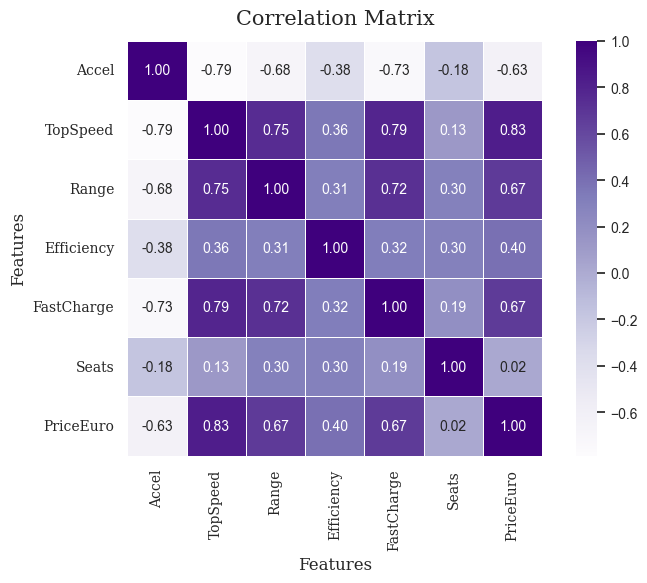

In [12]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Purples', cbar=True, square=True, fmt='.2f', linewidths=0.5, annot_kws={"size": 10})

cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.title('Correlation Matrix', fontfamily='serif', fontsize=15, pad=12)

plt.xticks(fontfamily='serif', fontsize=10)
plt.yticks(fontfamily='serif', fontsize=10)
plt.xlabel('Features', fontfamily='serif', fontsize=12)
plt.ylabel('Features', fontfamily='serif', fontsize=12)

plt.grid(linestyle='-', linewidth=0.5, color='lightgray')

plt.tight_layout()
plt.show()


### Model Building Using KMeansClustering

In [13]:
X=df.iloc[:,[2,3,4,5]]
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

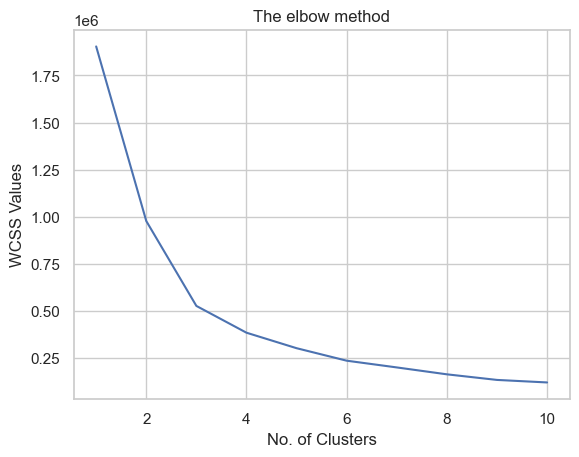

In [14]:
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS Values")
plt.show()

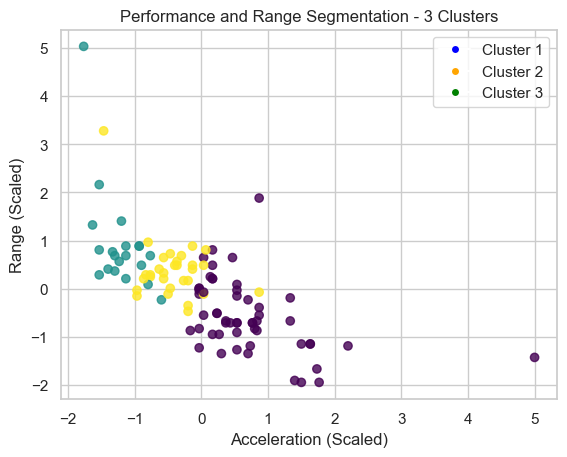

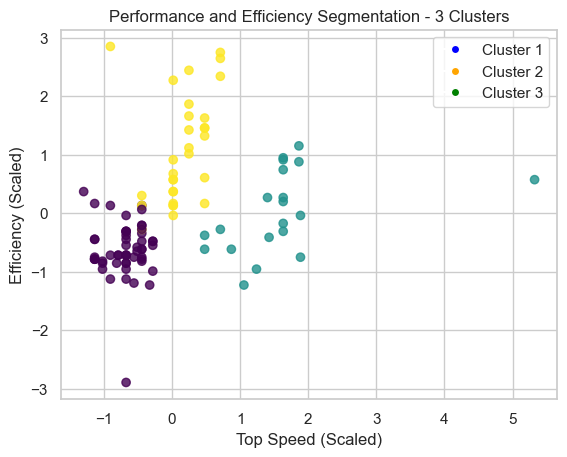

          Brand                            Model  Accel  TopSpeed  Range  \
0         Tesla    Model 3 Long Range Dual Motor    4.6       233    450   
1    Volkswagen                        ID.3 Pure   10.0       160    270   
2      Polestar                                2    4.7       210    400   
3           BMW                              iX3    6.8       180    360   
4         Honda                                e    9.5       145    170   
..          ...                              ...    ...       ...    ...   
98       Nissan                      Ariya 63kWh    7.5       160    330   
99         Audi    e-tron S Sportback 55 quattro    4.5       210    335   
100      Nissan              Ariya e-4ORCE 63kWh    5.9       200    325   
101      Nissan  Ariya e-4ORCE 87kWh Performance    5.1       200    375   
102       Byton                M-Byte 95 kWh 2WD    7.5       190    400   

     Efficiency ClusterName  
0           161   Cluster 2  
1           167   Cluster 1

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract relevant columns for clustering
X = df[['Accel', 'TopSpeed', 'Range', 'Efficiency']]

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering with 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Map cluster labels to cluster names
cluster_names = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}
df['ClusterName'] = df['Cluster'].map(cluster_names)

# Visualizing the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=df['Cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('Acceleration (Scaled)')
plt.ylabel('Range (Scaled)')
plt.title(f'Performance and Range Segmentation - {n_clusters} Clusters')
plt.legend(handles=[plt.Line2D([], [], marker='o', color='w', markerfacecolor='blue', label='Cluster 1'),
                    plt.Line2D([], [], marker='o', color='w', markerfacecolor='orange', label='Cluster 2'),
                    plt.Line2D([], [], marker='o', color='w', markerfacecolor='green', label='Cluster 3')])
plt.show()

plt.scatter(X_scaled[:, 1], X_scaled[:, 3], c=df['Cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('Top Speed (Scaled)')
plt.ylabel('Efficiency (Scaled)')
plt.title(f'Performance and Efficiency Segmentation - {n_clusters} Clusters')
plt.legend(handles=[plt.Line2D([], [], marker='o', color='w', markerfacecolor='blue', label='Cluster 1'),
                    plt.Line2D([], [], marker='o', color='w', markerfacecolor='orange', label='Cluster 2'),
                    plt.Line2D([], [], marker='o', color='w', markerfacecolor='green', label='Cluster 3')])
plt.show()

# Printing the data with assigned clusters
print(df[['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency', 'ClusterName']])